# Region proposal baseline

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from matplotlib import image as mpimg

Considered image:

In [66]:
img = mpimg.imread("../data/sample7.jpg")
img_flat = img_as_float(img)

# WINNER

SLIC !!! slic(img1, n_segments=100, compactness=20, sigma=10)

Even if Felzenszwalb looked promizing it does not scale good.

Considered images:

In [75]:
img1 = img_as_float(mpimg.imread("../data/sample2.jpg"))
img2 = img_as_float(mpimg.imread("../data/sample5.jpg"))
img3 = img_as_float(mpimg.imread("../data/sample7.jpg"))
img4 = img_as_float(mpimg.imread("../data/sample4.jpg"))

segments_slic33 = slic(img4, n_segments=200, compactness=20, sigma=10)
print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_slic33))))
plt.figure(figsize=(10,10))
plt.imshow(mark_boundaries(img4, segments_slic33))
plt.show()

Felzenszwalb number of segments: 49


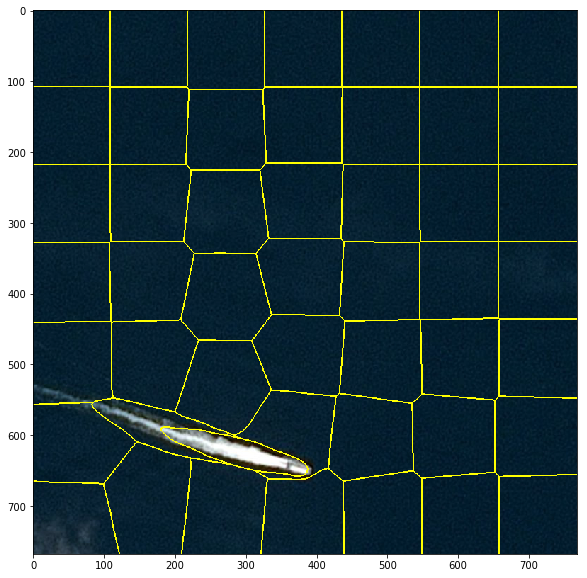

In [109]:
segments_slic33 = slic(img4, n_segments=50, compactness=20, sigma=10)
print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_slic33))))
plt.figure(figsize=(10,10))
plt.imshow(mark_boundaries(img4, segments_slic33))
plt.show()

Felzenszwalb number of segments: 100


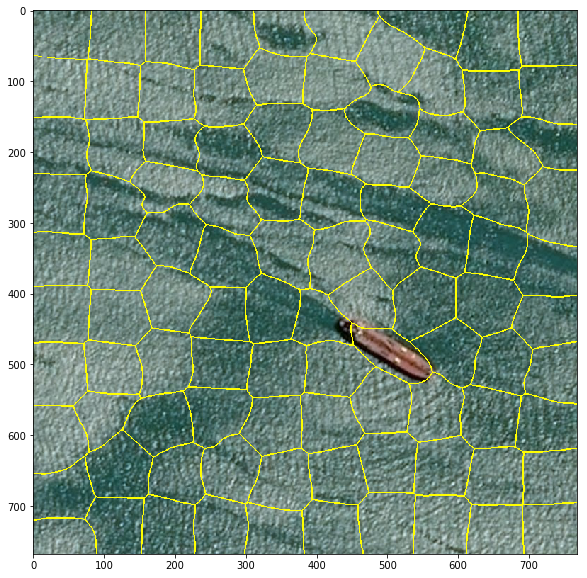

In [72]:
segments_slic33 = slic(img2, n_segments=100, compactness=20, sigma=10)
print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_slic33))))
plt.figure(figsize=(10,10))
plt.imshow(mark_boundaries(img2, segments_slic33))
plt.show()

Felzenszwalb number of segments: 100


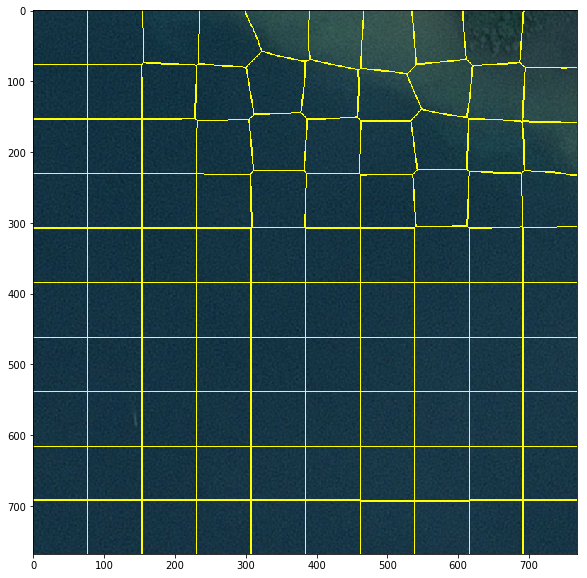

In [73]:
segments_slic33 = slic(img1, n_segments=100, compactness=20, sigma=10)
print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_slic33))))
plt.figure(figsize=(10,10))
plt.imshow(mark_boundaries(img1, segments_slic33))
plt.show()

# RESEARCH

## Felzenszwalb

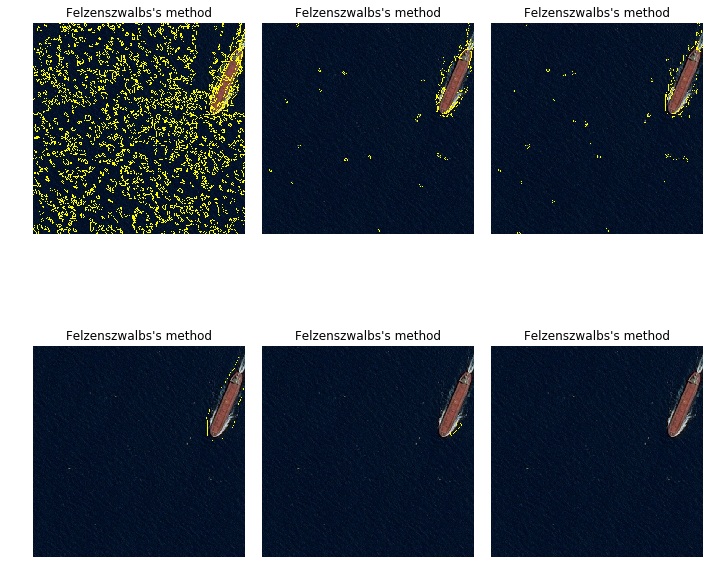

In [77]:
segments_fz1 = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_fz2 = felzenszwalb(img, scale=1000, sigma=0.7, min_size=50)
segments_fz3 = felzenszwalb(img, scale=1000, sigma=2, min_size=50)
segments_fz11 = felzenszwalb(img, scale=1000, sigma=10, min_size=100)
segments_fz22 = felzenszwalb(img, scale=1000, sigma=20, min_size=100)
segments_fz33 = felzenszwalb(img, scale=1000, sigma=30, min_size=100)

fig, ax = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz1))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_fz2))
ax[0, 1].set_title("Felzenszwalbs's method")
ax[0, 2].imshow(mark_boundaries(img, segments_fz3))
ax[0, 2].set_title("Felzenszwalbs's method")
ax[1, 0].imshow(mark_boundaries(img, segments_fz11))
ax[1, 0].set_title("Felzenszwalbs's method")
ax[1, 1].imshow(mark_boundaries(img, segments_fz22))
ax[1, 1].set_title("Felzenszwalbs's method")
ax[1, 2].imshow(mark_boundaries(img, segments_fz33))
ax[1, 2].set_title("Felzenszwalbs's method")

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

segments_fz11 = felzenszwalb(img1, scale=1000, sigma=10, min_size=100) looks promizing but look at the secon image ! It does not even restrict the image.

Felzenszwalb number of segments: 23
Felzenszwalb number of segments: 8


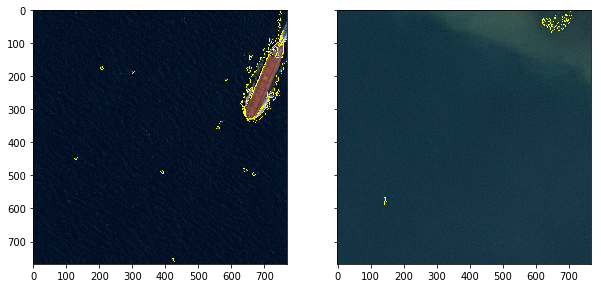

In [88]:
segments_fz_p1 = felzenszwalb(img, scale=1000, sigma=0.5, min_size=50)
segments_fz_p2 = felzenszwalb(img1, scale=1000, sigma=0.5, min_size=50)
print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz_p1))))
print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz_p2))))
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0].imshow(mark_boundaries(img, segments_fz_p1))
ax[1].imshow(mark_boundaries(img1, segments_fz_p2))

plt.show()

Felzenszwalb number of segments: 23


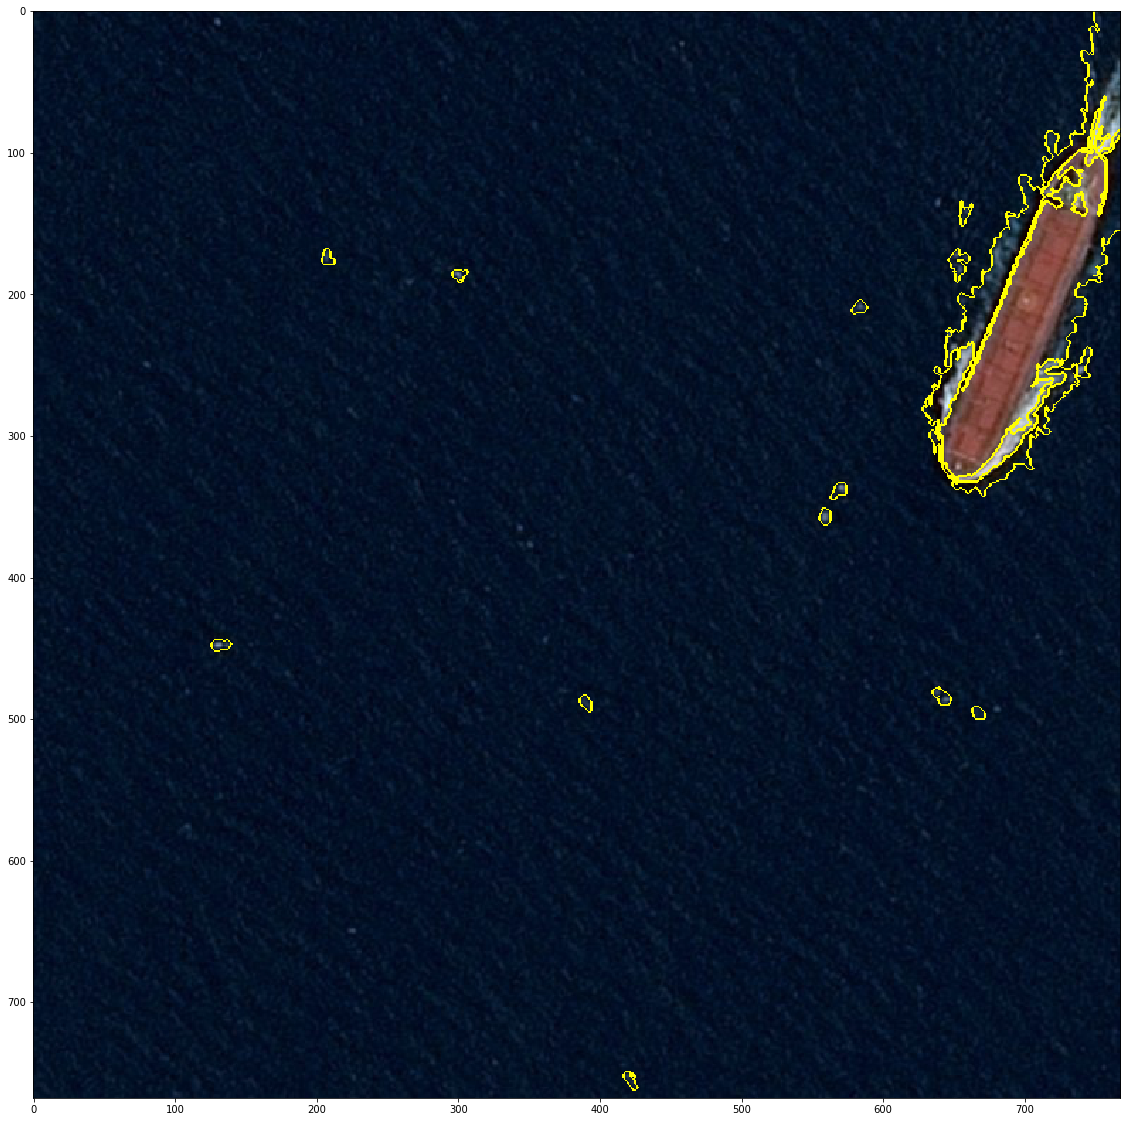

In [91]:
print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz_p1))))
plt.figure(figsize=(20,20))
plt.imshow(mark_boundaries(img, segments_fz_p1))
plt.show()

## SLIC

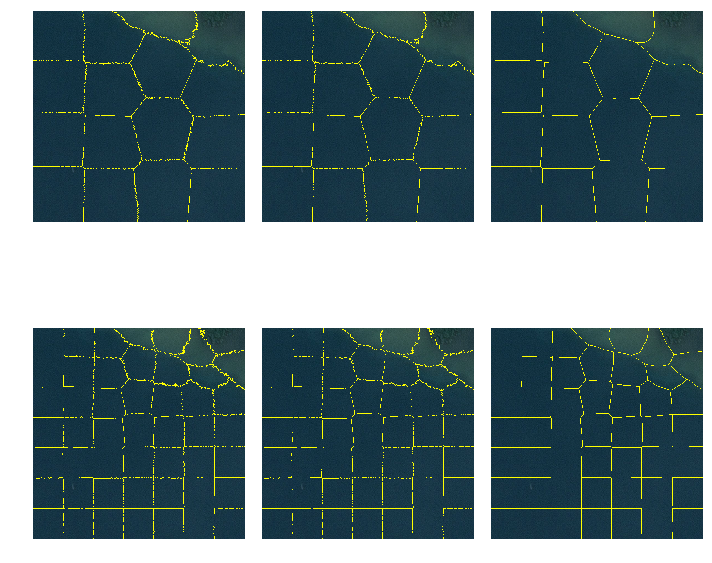

In [37]:
segments_slic1 = slic(img, n_segments=20, compactness=10, sigma=0.5)
segments_slic2 = slic(img, n_segments=20, compactness=10, sigma=1)
segments_slic3 = slic(img, n_segments=20, compactness=10, sigma=10)
segments_slic11 = slic(img, n_segments=50, compactness=10, sigma=0.5)
segments_slic22 = slic(img, n_segments=50, compactness=10, sigma=1)
segments_slic33 = slic(img, n_segments=50, compactness=10, sigma=10)

fig, ax = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_slic1))
ax[0, 1].imshow(mark_boundaries(img, segments_slic2))
ax[0, 2].imshow(mark_boundaries(img, segments_slic3))
ax[1, 0].imshow(mark_boundaries(img, segments_slic11))
ax[1, 1].imshow(mark_boundaries(img, segments_slic22))
ax[1, 2].imshow(mark_boundaries(img, segments_slic33))

#ax[0, 1].imshow(mark_boundaries(img, segments_slic))
#ax[0, 1].set_title('SLIC')
#ax[1, 0].imshow(mark_boundaries(img, segments_quick))
#ax[1, 0].set_title('Quickshift')
#ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
#ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

## quickshift

Too slow 

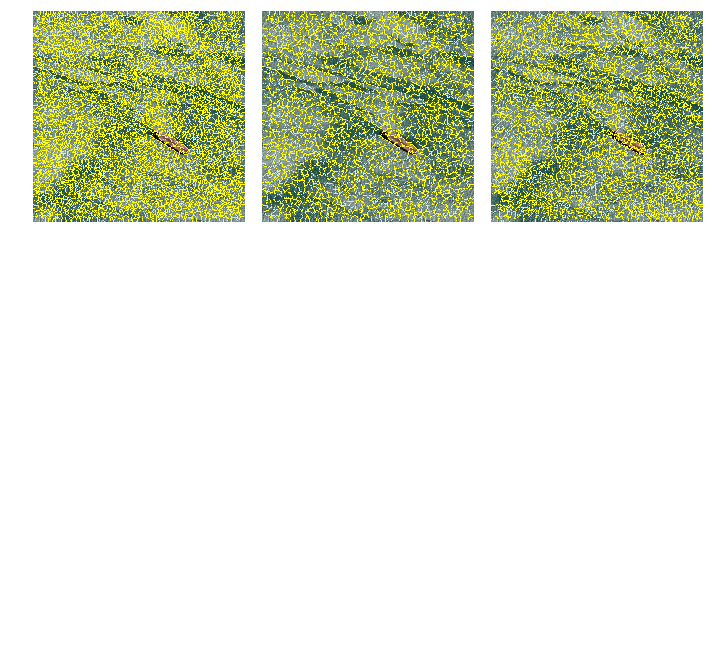

In [23]:
segments_quick1 = quickshift(img, kernel_size=3, max_dist=6, ratio=0.0003)
segments_quick2 = quickshift(img, kernel_size=3, max_dist=100, ratio=0.0003)
segments_quick3 = quickshift(img, kernel_size=3, max_dist=20, ratio=0.000003)
#segments_quick11 = quickshift(img, kernel_size=400, max_dist=6, ratio=0.5)
#segments_quick22 = quickshift(img, kernel_size=500, max_dist=6, ratio=0.5)
#segments_quick33 = quickshift(img, kernel_size=600, max_dist=6, ratio=0.5)

#print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz22))))

fig, ax = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_quick1))
ax[0, 1].imshow(mark_boundaries(img, segments_quick2))
ax[0, 2].imshow(mark_boundaries(img, segments_quick3))
#ax[1, 0].imshow(mark_boundaries(img, segments_quick11))
#ax[1, 1].imshow(mark_boundaries(img, segments_quick22))
#ax[1, 2].imshow(mark_boundaries(img, segments_quick33))

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

## watershed

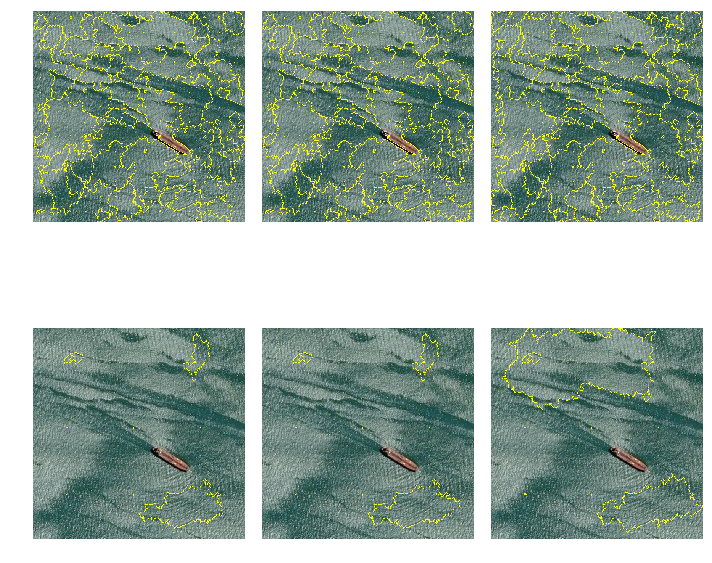

In [22]:
gradient = sobel(rgb2gray(img))

segments_watershed1 = watershed(gradient, markers=200, compactness=0.00000001)
segments_watershed2 = watershed(gradient, markers=200, compactness=0.000001)
segments_watershed3 = watershed(gradient, markers=200, compactness=0.00001)
segments_watershed11 = watershed(gradient, markers=10, compactness=0.00000001)
segments_watershed22 = watershed(gradient, markers=10, compactness=0.000001)
segments_watershed33 = watershed(gradient, markers=10, compactness=0.00001)

#print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz22))))
#print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
#print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))

fig, ax = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_watershed1))
ax[0, 1].imshow(mark_boundaries(img, segments_watershed2))
ax[0, 2].imshow(mark_boundaries(img, segments_watershed3))
ax[1, 0].imshow(mark_boundaries(img, segments_watershed11))
ax[1, 1].imshow(mark_boundaries(img, segments_watershed22))
ax[1, 2].imshow(mark_boundaries(img, segments_watershed33))

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()